In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
big = pd.read_excel("relevant_youtube_dataset.xlsx")

In [3]:
big.shape

(1904, 37)

In [4]:
small = pd.read_csv("handlabel_feature.csv")

In [5]:
small.shape

(407, 56)

In [6]:
df = pd.merge(left=small, right=big, left_on='video_id', right_on='video_id')

In [11]:
df.shape

(315, 92)

In [12]:
t = df.drop_duplicates(subset=['video_id'])

In [13]:
t

,Unnamed: 0,video_id,channel_title_x,channel_id_x,video_publish_date_x,video_title_x,video_description_x,video_category_x,video_view_count_x,video_comment_count_x,...,fear,joy,sadness,surprise,trust,negative,positive,emotion,AVAILABILITY,Censored
0,0,NcSUF8erpfU,The Daily Show with Trevor Noah,UCwWhs_6x42TyRM4Wstoq8HA,4/17/20 2:03,What Are the Craziest Coronavirus Conspiracy T...,From bat cuisine to 5G technology weakening im...,23,2377430,8481.0,...,0.012611,0.011128,0.014095,0.005935,0.014837,0.023739,0.026706,0.137240,VideoAvailable,0
1,1,V0yb0_a-WNc,penguinz0,UCq6VFHwMzcMXbuKyG7SQYIg,4/3/20 23:30,5G Coronavirus Conspiracy Is Insane,This is the greatest nonsense of All Time,24,1310678,18635.0,...,0.011355,0.003524,0.009397,0.004307,0.009397,0.022318,0.015270,0.097494,VideoAvailable,0
2,2,BkbztWS4-9I,BBC Newsnight,UC6o-wWU-v2ClFMwougmK7dA,3/5/20 14:32,Coronavirus: The conspiracy theories spreading...,"From a secret plan to stop Brexit, to a virus ...",25,1046631,7652.0,...,0.014724,0.008589,0.006748,0.006135,0.022086,0.020859,0.030675,0.142331,VideoAvailable,0
3,4,7OVT3N5_4to,TechMagnet,UCtT2VnurQKOAA0I1EKKHSPA,3/16/20 17:35,Is 5G the CAUSE of CORONAVIRUS? (COVID-19),Does 5G cause Coronavirus ? Is the new COVID-1...,28,912978,6823.0,...,0.004447,0.004708,0.004708,0.003924,0.012294,0.007063,0.017526,0.066963,VideoAvailable,0
4,5,8ocWUAwQMhY,LogicBeforeAuthority,UCTOLWfTDKvFQHSCQSIssVTQ,3/16/20 20:33,CONFIRMED! 5G Forced Installation In Schools ...,"Guys, you need to get involved and do anything...",25,586496,3037.0,...,0.009218,0.004768,0.006675,0.002543,0.013032,0.014304,0.018754,0.086459,VideoAvailable,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,402,bHkcnuJhDp8,The Sun,UCIzXayRP7-P0ANpq-nD-h5g,5/2/20 17:38,5G coronavirus conspiracy theorists stage anti...,5G coronavirus conspiracy theorists today stag...,25,45047,1047.0,...,0.046875,0.007812,0.039062,0.000000,0.031250,0.062500,0.031250,0.273438,VideoAvailable,0
309,403,cszlsGiD1-E,Corbett Report Extras,UCM6EbmEFrTbrQ_31bUx5h3w,3/6/20 14:24,Fact Checking the 5G/Coronavirus Hypothesis,SHOW NOTES AND MP3 AUDIO: https://www.corbettr...,28,45018,847.0,...,0.007153,0.004390,0.003577,0.002926,0.008942,0.009267,0.015445,0.065843,VideoAvailable,0
310,404,edXRrJPdoHA,LMG Clips,UCFLFc8Lpbwt4jPtY1_Ai5yA,4/15/20 17:06,5G Doesn't Cause COVID19 That's DUMB!,Watch the full WAN Show: https://youtu.be/hXp3...,28,44337,822.0,...,0.008436,0.003067,0.006902,0.003067,0.011503,0.016871,0.022239,0.089724,VideoAvailable,0
311,405,fS4OiNzdPAw,South China Morning Post,UC4SUWizzKc1tptprBkWjX2Q,4/28/20 7:18,"How Wuhan, the 5G conspiracy, mask diplomacy a...",SCMP journalists Mimi Lau and Kinling Lo prese...,25,44138,164.0,...,0.008103,0.003638,0.004961,0.003473,0.008269,0.012899,0.017529,0.073921,VideoAvailable,0


In [14]:
t.columns

Index(['Unnamed: 0', 'video_id', 'channel_title_x', 'channel_id_x',
       'video_publish_date_x', 'video_title_x', 'video_description_x',
       'video_category_x', 'video_view_count_x', 'video_comment_count_x',
       'video_like_count_x', 'video_dislike_count_x', 'video_thumbnail_x',
       'video_tags_x', 'collection_date_x', 'science.topic_x', 'Relevancy_x',
       'attitude', 'Text/video', 'search.term_x', 'cld2_x', 'transcript_x',
       'transcript_nchar_x', 'videoid', 'conspiracy', 'var_r', 'var_g',
       'var_b', 'var_h', 'var_s', 'var_v', 'var_bright', 'var_bright_sd',
       'var_contrast', 'var_colorful', 'median_r', 'median_g', 'median_b',
       'median_h', 'median_s', 'median_v', 'median_bright', 'median_bright_sd',
       'median_contrast', 'median_colorful', 'r_mean', 'g_mean', 'b_mean',
       'h_mean', 's_mean', 'v_mean', 'bright_mean', 'lightning_mean',
       'contrast_mean', 'colorful_mean', 'color_lag', 'channel_title_y',
       'channel_id_y', 'video_publish_d

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
t['attitude'] = le.fit_transform(t['attitude'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
t.columns.tolist()[45:55]

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'negative',
 'positive']

In [17]:
t.columns.tolist()[25:45]

['var_r',
 'var_g',
 'var_b',
 'var_h',
 'var_s',
 'var_v',
 'var_bright',
 'var_bright_sd',
 'var_contrast',
 'var_colorful',
 'median_r',
 'median_g',
 'median_b',
 'median_h',
 'median_s',
 'median_v',
 'median_bright',
 'median_bright_sd',
 'median_contrast',
 'median_colorful']

In [60]:
X = t[['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'negative',
 'positive','var_r',
 'var_g',
 'var_b',
 'var_h',
 'var_s',
 'var_v',
 'var_bright',
 'var_bright_sd',
 'var_contrast',
 'var_colorful',
 'median_r',
 'median_g',
 'median_b',
 'median_h',
 'median_s',
 'median_v',
 'median_bright',
 'median_bright_sd',
 'median_contrast',
 'median_colorful']]
X

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,...,median_r,median_g,median_b,median_h,median_s,median_v,median_bright,median_bright_sd,median_contrast,median_colorful
0,0.008902,0.011869,0.007418,0.012611,0.011128,0.014095,0.005935,0.014837,0.023739,0.026706,...,99.315580,85.044938,112.727762,86.092826,134.038498,134.587656,92.603380,66.266163,220.0,74.248203
1,0.007831,0.007439,0.006656,0.011355,0.003524,0.009397,0.004307,0.009397,0.022318,0.015270,...,126.550148,128.666820,130.396076,83.762660,39.437676,134.533176,128.116216,75.928568,241.0,19.761427
2,0.011656,0.014724,0.006135,0.014724,0.008589,0.006748,0.006135,0.022086,0.020859,0.030675,...,82.593592,44.906568,92.771928,116.763216,175.650236,106.260372,61.527896,54.770904,190.0,71.947426
3,0.002616,0.007586,0.002093,0.004447,0.004708,0.004708,0.003924,0.012294,0.007063,0.017526,...,79.772896,73.095122,103.627240,107.586062,112.794364,110.728122,77.605316,50.424047,182.0,56.541083
4,0.005722,0.008900,0.002543,0.009218,0.004768,0.006675,0.002543,0.013032,0.014304,0.018754,...,178.297660,182.070140,183.746428,67.315794,5.285804,184.217756,181.100160,92.073127,255.0,10.850100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0.023438,0.015625,0.015625,0.046875,0.007812,0.039062,0.000000,0.031250,0.062500,0.031250,...,111.254992,113.640668,101.466524,65.478744,56.372900,122.471632,112.078180,69.131249,237.0,30.316916
309,0.004877,0.006828,0.002439,0.007153,0.004390,0.003577,0.002926,0.008942,0.009267,0.015445,...,123.212802,119.276686,102.296032,79.687310,70.830036,129.006988,118.347988,63.955769,210.0,34.442498
310,0.006135,0.007669,0.003834,0.008436,0.003067,0.006902,0.003067,0.011503,0.016871,0.022239,...,126.875756,101.686932,90.995444,37.053376,85.170332,128.535556,108.091288,70.702156,249.0,54.941191
311,0.005292,0.006615,0.003142,0.008103,0.003638,0.004961,0.003473,0.008269,0.012899,0.017529,...,128.762536,80.070008,88.208350,124.785384,164.544432,141.974716,95.623774,77.683406,241.0,97.623431


In [61]:
y = t['attitude']
y

0      0
1      0
2      0
3      0
4      1
      ..
308    1
309    0
310    0
311    0
314    0
Name: attitude, Length: 293, dtype: int64

In [62]:
from sklearn.model_selection import cross_validate
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,
                              random_state=1,
                             min_samples_split= 5)
cv = cross_validate(forest, X, y, cv=10,scoring = ['precision','recall'])



In [63]:

print(cv['test_precision'].mean())
print(cv['test_recall'].mean())




0.6955564818323439
0.9342105263157896


In [46]:

print(cv['test_precision'].mean())
print(cv['test_recall'].mean())




0.7008332193030469
0.8976284584980239


In [45]:
cv

{'fit_time': array([0.93233371, 0.91331887, 0.91862392, 0.90757394, 0.96809912,
        0.98108816, 0.99804282, 1.00927901, 1.120193  , 1.00131297]),
 'score_time': array([0.03720236, 0.03695202, 0.03740692, 0.03768516, 0.03890371,
        0.04208779, 0.04058313, 0.04166508, 0.05160022, 0.04325318]),
 'test_precision': array([0.72413793, 0.72413793, 0.68965517, 0.7037037 , 0.64285714,
        0.7       , 0.71428571, 0.72413793, 0.66666667, 0.71875   ]),
 'test_recall': array([0.91304348, 0.91304348, 0.86956522, 0.82608696, 0.81818182,
        0.95454545, 0.90909091, 0.95454545, 0.81818182, 1.        ])}

In [29]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state = 123, stratify = y)
model = forest.fit(X_train,y_train)
perm = PermutationImportance(model).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0373 ± 0.0254,sadness
0.0339 ± 0.0214,var_contrast
0.0339 ± 0.0606,median_colorful
0.0271 ± 0.0166,surprise
0.0237 ± 0.0271,fear
0.0169 ± 0.0214,median_h
0.0136 ± 0.0542,median_s
0.0136 ± 0.0450,trust
0.0136 ± 0.0136,median_bright_sd
0.0136 ± 0.0136,median_g


In [43]:
eli5.show_weights(perm, feature_names=X_test.columns.tolist(),top = 30)

Weight,Feature
0.0373 ± 0.0254,sadness
0.0339 ± 0.0214,var_contrast
0.0339 ± 0.0606,median_colorful
0.0271 ± 0.0166,surprise
0.0237 ± 0.0271,fear
0.0169 ± 0.0214,median_h
0.0136 ± 0.0542,median_s
0.0136 ± 0.0450,trust
0.0136 ± 0.0136,median_bright_sd
0.0136 ± 0.0136,median_g


In [42]:
X.columns[18]

'var_contrast'

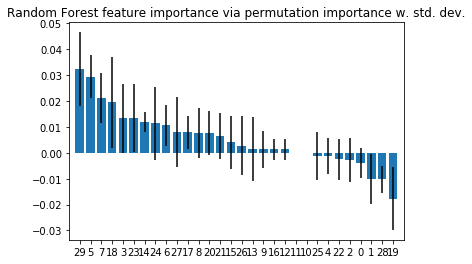

In [34]:
import numpy as np
from mlxtend.evaluate import feature_importance_permutation
from sklearn.metrics import f1_score
imp_vals, imp_all = feature_importance_permutation(
    predict_method= model.predict, 
    X=X_test.values,
    y=y_test,
    metric=f1_score,
    num_rounds=10,
    seed=1)


std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance w. std. dev.")
plt.bar(range(X.shape[1]), imp_vals[indices],
        yerr=std[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

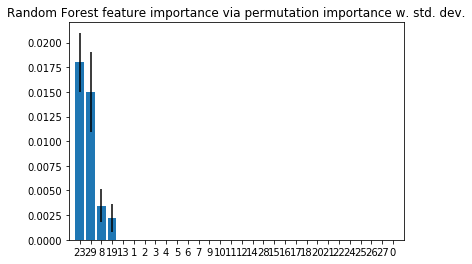

In [35]:
import numpy as np
from mlxtend.evaluate import feature_importance_permutation
from sklearn.metrics import f1_score
imp_vals, imp_all = feature_importance_permutation(
    predict_method= model.predict, 
    X=X_train.values,
    y=y_train,
    metric=f1_score,
    num_rounds=10,
    seed=1)


std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance w. std. dev.")
plt.bar(range(X.shape[1]), imp_vals[indices],
        yerr=std[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()